In [1]:
import pandas as pd

series = 1d array of data

In [2]:
series = pd.Series(range(10))

A series has values and an index.  This index is automatically generated oridinal values.

In [3]:
series

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

The values in the series are just a `numpy` array

In [4]:
series.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
type(series.values)

numpy.ndarray

Again, the index is by default, oridinal values but is stored differently in `pandas`, similar to the built-in `range` function in Python.

In [6]:
series.index

RangeIndex(start=0, stop=10, step=1)

However, the index can be explictly created too.  Here the index is every other uppercase letter.

In [7]:
import string
series = pd.Series(range(10), index=[string.ascii_uppercase[x] for x in range(0, 20, 2)])

In [8]:
series

A    0
C    1
E    2
G    3
I    4
K    5
M    6
O    7
Q    8
S    9
dtype: int64

In [9]:
series.index

Index(['A', 'C', 'E', 'G', 'I', 'K', 'M', 'O', 'Q', 'S'], dtype='object')

The index property can also be assigned after the fact.

In [10]:
series.index = 'zero one two three four five six seven eight nine'.split(' ')

In [11]:
series

zero     0
one      1
two      2
three    3
four     4
five     5
six      6
seven    7
eight    8
nine     9
dtype: int64

A series can also be created from existing sequences.

In [12]:
mem_rain_avg = [3.98, 4.93, 5.16, 5.50, 5.25, 3.63, 4.59, 2.88, 3.09, 3.98, 5.49, 5.74]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [13]:
mem_rain = pd.Series(mem_rain_avg, index=months)

mem_rain

Jan    3.98
Feb    4.93
Mar    5.16
Apr    5.50
May    5.25
Jun    3.63
Jul    4.59
Aug    2.88
Sep    3.09
Oct    3.98
Nov    5.49
Dec    5.74
dtype: float64

The series can be accessed by values in the index.

In [14]:
mem_rain['Jun']

3.6299999999999999

It also works similar to slicing in the built-in list.  Note that both endpoints are included.

In [15]:
mem_rain['Mar':'Nov']

Mar    5.16
Apr    5.50
May    5.25
Jun    3.63
Jul    4.59
Aug    2.88
Sep    3.09
Oct    3.98
Nov    5.49
dtype: float64

Now let's create a dictionary from the rainfall and months.  The `zip` function will create a list of tuples from the arguments.  Iterating over those tuples, we can then create a dictionary using a syntax similar to list comprehensions.

In [16]:
mem_rain_dict = {month:rain for (month, rain) in zip(months, mem_rain_avg)}

In [17]:
mem_rain_dict

{'Apr': 5.5,
 'Aug': 2.88,
 'Dec': 5.74,
 'Feb': 4.93,
 'Jan': 3.98,
 'Jul': 4.59,
 'Jun': 3.63,
 'Mar': 5.16,
 'May': 5.25,
 'Nov': 5.49,
 'Oct': 3.98,
 'Sep': 3.09}

And create a `Series` from that dictionary

In [18]:
mem_rain_from_dict = pd.Series(mem_rain_dict)

In [19]:
mem_rain_from_dict

Apr    5.50
Aug    2.88
Dec    5.74
Feb    4.93
Jan    3.98
Jul    4.59
Jun    3.63
Mar    5.16
May    5.25
Nov    5.49
Oct    3.98
Sep    3.09
dtype: float64

Notice that the dictionary is no longer ordered chronologically by month.  This is because a dictionary is similar to a hashtable.  It's doesn't care about the order of the keys.  It stores then in the order it finds most efficient.  In this case that happens to be alphabetical.

And let's get the snowfall totals in a `Series`.

In [20]:
mem_snow_avg = [1.9, 1.3, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
mem_snow = pd.Series(mem_snow_avg, index=months)

mem_snow

Jan    1.9
Feb    1.3
Mar    0.4
Apr    0.0
May    0.0
Jun    0.0
Jul    0.0
Aug    0.0
Sep    0.0
Oct    0.0
Nov    0.0
Dec    0.2
dtype: float64

Now I want to see the rain and snowfall together.  I can do this with a `DataFrame` which is a 2-d table of data.  The `DataFrame` can be created in a number of ways.  Here I am using a dictionary.  The keys will be column headers.  The values can be a dictionary or a `Series`.

Notice that the order of the keys in the dictionary and the order of the index in the series is different.

In [21]:
mem_precip = pd.DataFrame({'rain': mem_rain_dict, 'snow': mem_snow})

mem_precip

,rain,snow
Apr,5.50,0.0
Aug,2.88,0.0
Dec,5.74,0.2
Feb,4.93,1.3
Jan,3.98,1.9
Jul,4.59,0.0
Jun,3.63,0.0
Mar,5.16,0.4
May,5.25,0.0
Nov,5.49,0.0


But the data frame aligns them using the order of the first pair in the dictionary.

In [22]:
mem_precip.index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

However I can reorder them in chronological order too.

In [23]:
mem_precip.reindex(months)

,rain,snow
Jan,3.98,1.9
Feb,4.93,1.3
Mar,5.16,0.4
Apr,5.50,0.0
May,5.25,0.0
Jun,3.63,0.0
Jul,4.59,0.0
Aug,2.88,0.0
Sep,3.09,0.0
Oct,3.98,0.0


Capture the result of the most recent operations with the underscore

In [24]:
mem_precip = _

Summary of some descriptive statistics about the data.

In [25]:
mem_precip.describe()

,rain,snow
count,12.000000,12.000000
mean,4.518333,0.316667
std,0.982343,0.624985
min,2.880000,0.000000
25%,3.892500,0.000000
50%,4.760000,0.000000
75%,5.310000,0.250000
max,5.740000,1.900000


Or a single column.

In [26]:
mem_precip.rain.mean()

4.5183333333333335

Creating a new column is as easy as:

In [27]:
mem_precip['total'] = mem_precip.rain + mem_precip.snow

In [28]:
mem_precip

,rain,snow,total
Jan,3.98,1.9,5.88
Feb,4.93,1.3,6.23
Mar,5.16,0.4,5.56
Apr,5.50,0.0,5.50
May,5.25,0.0,5.25
Jun,3.63,0.0,3.63
Jul,4.59,0.0,4.59
Aug,2.88,0.0,2.88
Sep,3.09,0.0,3.09
Oct,3.98,0.0,3.98


The values in the data frame are merely a numpy array and can be treated as such.

In [29]:
mem_precip.values

array([[ 3.98,  1.9 ,  5.88],
       [ 4.93,  1.3 ,  6.23],
       [ 5.16,  0.4 ,  5.56],
       [ 5.5 ,  0.  ,  5.5 ],
       [ 5.25,  0.  ,  5.25],
       [ 3.63,  0.  ,  3.63],
       [ 4.59,  0.  ,  4.59],
       [ 2.88,  0.  ,  2.88],
       [ 3.09,  0.  ,  3.09],
       [ 3.98,  0.  ,  3.98],
       [ 5.49,  0.  ,  5.49],
       [ 5.74,  0.2 ,  5.94]])

In [30]:
type(mem_precip.values)

numpy.ndarray

In [31]:
mem_snow_values = mem_precip.values[:,1]

In [32]:
mem_snow_values

array([ 1.9,  1.3,  0.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0.2])

In [33]:
mem_snow_values.mean()

0.31666666666666671

To get a row from a data frame, use `iloc`.

In [34]:
mem_precip.iloc[2]

rain     5.16
snow     0.40
total    5.56
Name: Mar, dtype: float64

In [35]:
mem_precip.iloc[2, 1]

0.40000000000000002

It also works with slicing

In [36]:
mem_precip.iloc[:3, :2]

,rain,snow
Jan,3.98,1.9
Feb,4.93,1.3
Mar,5.16,0.4


And indicies too, with `loc`.

In [37]:
mem_precip.loc['Mar']

rain     5.16
snow     0.40
total    5.56
Name: Mar, dtype: float64

In [38]:
mem_precip.loc['Mar', 'snow']

0.40000000000000002

In [39]:
mem_precip.loc[:'Mar', :'snow']

,rain,snow
Jan,3.98,1.9
Feb,4.93,1.3
Mar,5.16,0.4


Show which months have snowfall.

In [40]:
mem_precip.snow > 0

Jan     True
Feb     True
Mar     True
Apr    False
May    False
Jun    False
Jul    False
Aug    False
Sep    False
Oct    False
Nov    False
Dec     True
Name: snow, dtype: bool

And select only those rows

In [41]:
mem_precip[mem_precip.snow > 0]

,rain,snow,total
Jan,3.98,1.9,5.88
Feb,4.93,1.3,6.23
Mar,5.16,0.4,5.56
Dec,5.74,0.2,5.94


The average total precipation for months in which there is snow

In [42]:
_.total.mean()

5.902500000000001

Get only certain columns

In [43]:
mem_precip.loc[mem_precip.snow > 0, ['rain', 'total']]

,rain,total
Jan,3.98,5.88
Feb,4.93,6.23
Mar,5.16,5.56
Dec,5.74,5.94


And sum them

In [44]:
_.sum()

rain     19.81
total    23.61
dtype: float64

#### Visualizing Data Frames

Our friends from `matplotlib`

In [45]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

It's possible to use raw values from the data frame

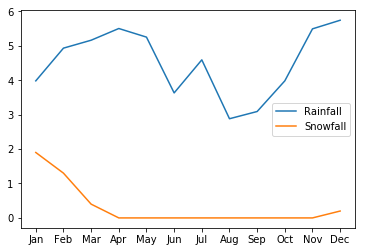

In [46]:
fig, axs = plt.subplots()
axs.set_xticklabels(months)
plt.plot(np.arange(len(mem_precip.rain)), mem_precip.rain)
plt.plot(np.arange(len(mem_precip.snow)), mem_precip.snow)
plt.xticks(np.arange(12))
plt.legend(['Rainfall', 'Snowfall'])

But it's easier to use the `plot` method

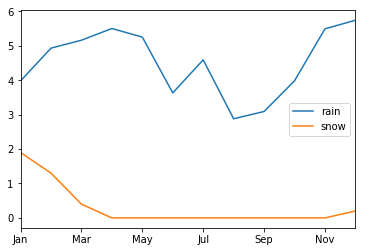

In [47]:
mem_precip[['rain', 'snow']].plot()

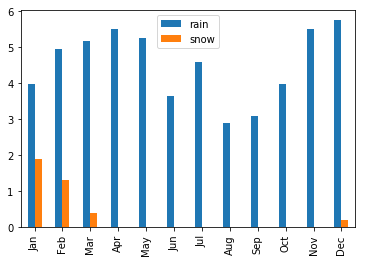

In [48]:
mem_precip[['rain', 'snow']].plot.bar()

The `plot` can also take a colormap, just like in `matplotlib`.

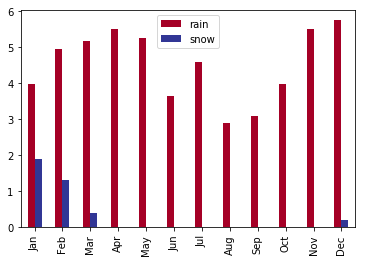

In [49]:
mem_precip[['rain', 'snow']].plot.bar(cmap='RdYlBu')

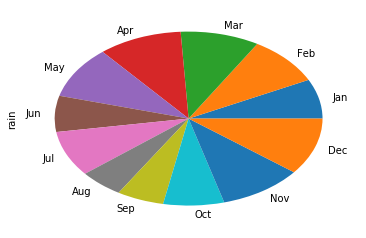

In [50]:
mem_precip.rain.plot.pie()

Add the percentage each month has of the yearly rainfall.

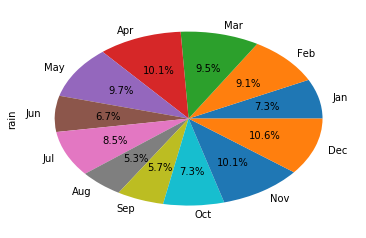

In [51]:
mem_precip.rain.plot.pie(autopct='%1.1f%%')

And we can get really fancy.  Here I'm finding the row with the most rainfall and extracting its index.  Then I want to separate that month from the rest.  This is done with the `callouts` and is just a list/array of floats where the larger values are distanced more from the chart.  I'll give the callout for the rainiest month a larger value.  Then in rendering the chart, I'll again use the percentages, pass the callouts to the `explode` keyword (note it must be a tuple), rotate the chart 90 degrees so that January is on top, and resize the chart to be of equal height and width so that it's a circle and not an oval

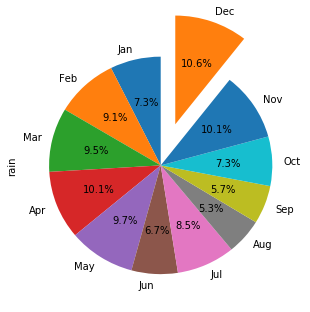

In [52]:
rainiest_month = mem_precip.rain.max()
idx = np.where(mem_precip.rain.values == rainiest_month)[0][0]
callouts = np.zeros(12)
callouts[idx] = .4
mem_precip.rain.plot.pie(autopct='%1.1f%%', explode=tuple(callouts), startangle=90, figsize=(5, 5))